In [24]:

import geopandas
from geopandas import GeoDataFrame, GeoSeries
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from shapely.geometry import Point, Polygon
import numpy as np
import googlemaps
from datetime import datetime
plt.rcParams["figure.figsize"] = [8,6]


# The file here looks at all California Dept of Fires (CDF) data from 2020 onwards. Polygons are thus mostly limited to California.
fires = GeoDataFrame.from_file('./Interagency_Fire_Perimeter_History_-_All_Years (2)/InteragencyFirePerimeterHistory.shp')

# Here's how the data is looking like, for reference.


<AxesSubplot:>

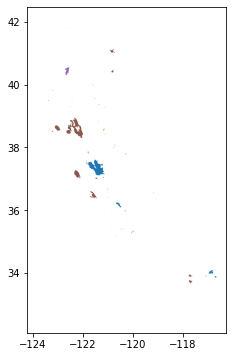

In [25]:
# FID looks like just the row numbers given after the filtering done on the dept end - nothing useful 
# Object ID may take into account the fact that we have filtered the data (some get skipped here and there).
fires = fires.set_index('FID')
fires = fires.sort_index()

# Plot and color by map_method. In other words, provide different colors for different classifications (e.g. blue for GPS Ground, red for Infrared)
# Not really needed, but interesting to see, and we can use this later in our analysis if needed.
fires.plot(column = 'MAP_METHOD')


['33.85868593477873,-116.6470528701483']


TypeError: unsupported operand type(s) for +=: 'dict' and 'list'

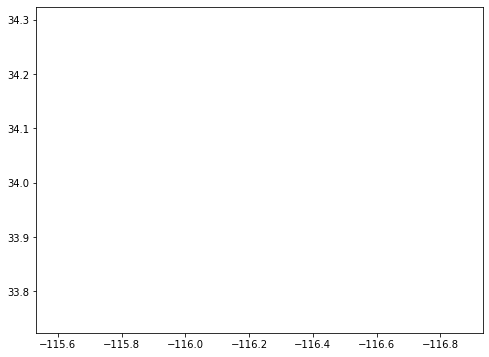

In [26]:

# Just some example bounds, can modify later


startx = -114.13276715586254
endx = -124.38498819727948
starty = 32.5239920572277
endy = 42.01477274871176

result = []

for x in np.arange(startx, endx, -1.4):
    boundx1 = x
    boundx2 = x - 1.4
    for y in np.arange(starty, endy, 0.6):
        boundy1 = y
        boundy2 = y + 0.6
        
        #print(boundx1, boundx2, boundy1, boundy2)
        plt.gca().set_xlim([boundx1, boundx2])
        plt.gca().set_ylim([boundy1, boundy2])

# make a grid of latitude-longitude values
        xmin, xmax, ymin, ymax = boundx1, boundx2, boundy1, boundy2
        xx, yy = np.meshgrid(np.linspace(xmin,xmax,50), np.linspace(ymin,ymax,50))
        xc = xx.flatten()
        yc = yy.flatten()

# Now convert these points to geo-data - may take a few minutes to do at most.
        pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])
        in_map =  np.array([pts.within(geom) for geom in fires.geometry]).sum(axis=0)
        pts = GeoSeries([val for pos,val in enumerate(pts) if in_map[pos]])

#pts.plot(markersize=1)

# We now have the points.

# (Reformat strings if needed to another type than the one given below - format rn is "Lat,Long")
        coords = []
        
        for n, point in enumerate(pts):
            c = []
            coords += [','.join(__ for __ in _.strip().split(' ')[::-1]) for _ in str(point).split('(')[1].split(')')[0].split(',')]
            coords = coords.split(',')
            c.append(float(coords[0]))
            c.append(float(coords[1]))
            result += c

# coords has the final answers we are looking for.

# This is setting up our zoomed in version of the map we are interested in.
# In this case, the coordinates provided in the long and lat limits (xlim, ylim)

In [ ]:
print(result)

['33.85868593477873,-116.6470528701483', '33.85868593477873,-116.6470528701483', '33.85868593477873,-116.6756242987197', '33.85868593477873,-116.6470528701483', '33.85868593477873,-116.6756242987197', '33.87093083273791,-116.6470528701483', '33.85868593477873,-116.6470528701483', '33.85868593477873,-116.6756242987197', '33.87093083273791,-116.6470528701483', '33.87093083273791,-116.6756242987197', '33.85868593477873,-116.6470528701483', '33.85868593477873,-116.6756242987197', '33.87093083273791,-116.6470528701483', '33.87093083273791,-116.6756242987197', '33.87093083273791,-116.7041957272911', '33.85868593477873,-116.6470528701483', '33.85868593477873,-116.6756242987197', '33.87093083273791,-116.6470528701483', '33.87093083273791,-116.6756242987197', '33.87093083273791,-116.7041957272911', '33.88317573069709,-116.6756242987197', '33.85868593477873,-116.6470528701483', '33.85868593477873,-116.6756242987197', '33.87093083273791,-116.6470528701483', '33.87093083273791,-116.6756242987197',

In [ ]:
# Just to show that coords has only the filtered coordinates.
#print(coords[:14])

In [ ]:
#print(len(coords))

In [ ]:
#print(coords)